# Python lang code 


importing the Different Python Libraries to run the machine learning code

Such as pandas, matplotlib and seaborn etc..
These libraries are commonly used together in data analysis and visualization workflows. The use of these libraries will typically involve loading and manipulating data with Pandas, and then creating visualizations with Matplotlib and/or Seaborn.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loading tha data from football latest.csv file to the dataframe(df)

In [2]:
df = pd.read_csv('football latest.csv')

get the concise summary of the data using .info() command

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Player           285 non-null    object
 1   Tm               285 non-null    object
 2   Pos              285 non-null    object
 3   Status           285 non-null    int64 
 4   Injury Comment   285 non-null    object
 5   Practice Status  285 non-null    object
dtypes: int64(1), object(5)
memory usage: 13.5+ KB


Dimensions of the dataset

In [4]:
df.shape

(285, 6)

Getting the info of starting 5 and last 5 rows of dataset 

In [5]:
df.head()

,Player,Tm,Pos,Status,Injury Comment,Practice Status
0,Trent Sherfield,BUF,WR,0,Ankle,Limited Participation In Practice
1,Jordan Phillips,BUF,DT,0,Knee,Limited Participation In Practice
2,Micah Hyde,BUF,S,0,Neck,Limited Participation In Practice
3,Christian Benford,BUF,CB,0,Hamstring,Limited Participation In Practice
4,Dorian Williams,BUF,LB,0,Knee,Limited Participation In Practice


In [6]:
df.tail()

,Player,Tm,Pos,Status,Injury Comment,Practice Status
280,James Smith-Williams,WAS,DE,0,Hamstring,Did Not Participate In Practice
281,Kendall Fuller,WAS,CB,0,NIR - Rest,Did Not Participate In Practice
282,Jonathan Allen,WAS,DT,1,NIR - Rest,Did Not Participate In Practice
283,Benjamin St-Juste,WAS,CB,0,Illness,Full Participation In Practice
284,Curtis Samuel,WAS,WR,0,Toe,Limited Participation In Practice


using Matplotlib and Seaborn to create a countplot, which is a type of bar plot, to visualize the distribution of injuries by team position ('Pos') and status ('Status').

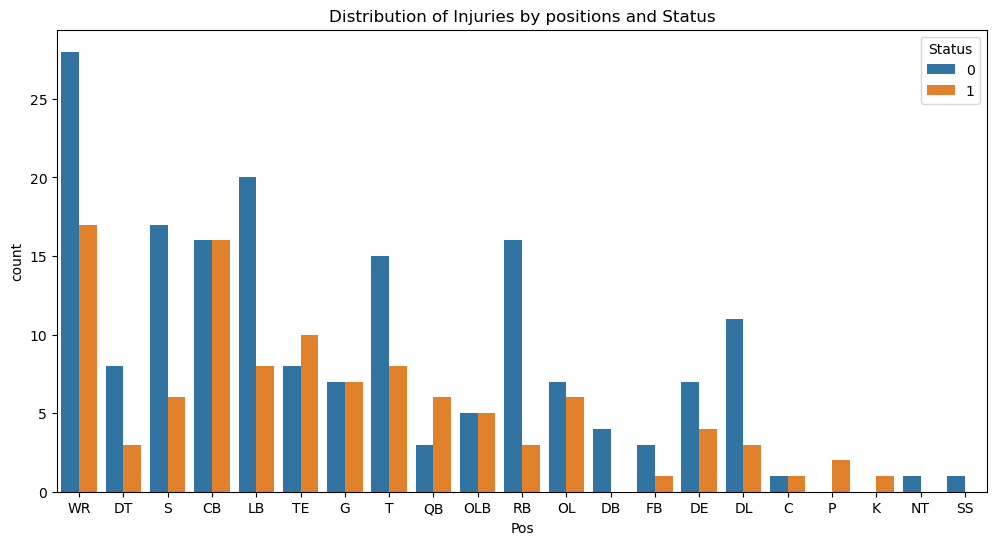

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Pos', hue='Status', data=df)
plt.title('Distribution of Injuries by positions and Status')
plt.show()

Analysis of above chart

Following an injury, wide receiver (WR) position players face the highest likelihood of being sidelined during a match, with linebackers (LB), running backs (RB), safeties (S), tackles (T), defensive linemen (DL), and others in various positions following suit. Notably, cornerbacks (CB), guards (G), and outside linebackers (OLB) share an equal probability of either continuing to play or exiting the match after sustaining injuries. On the other hand, tight ends (TE), quarterbacks (QB), and punters (P) exhibit higher chances of remaining in the game even in the aftermath of an injury.

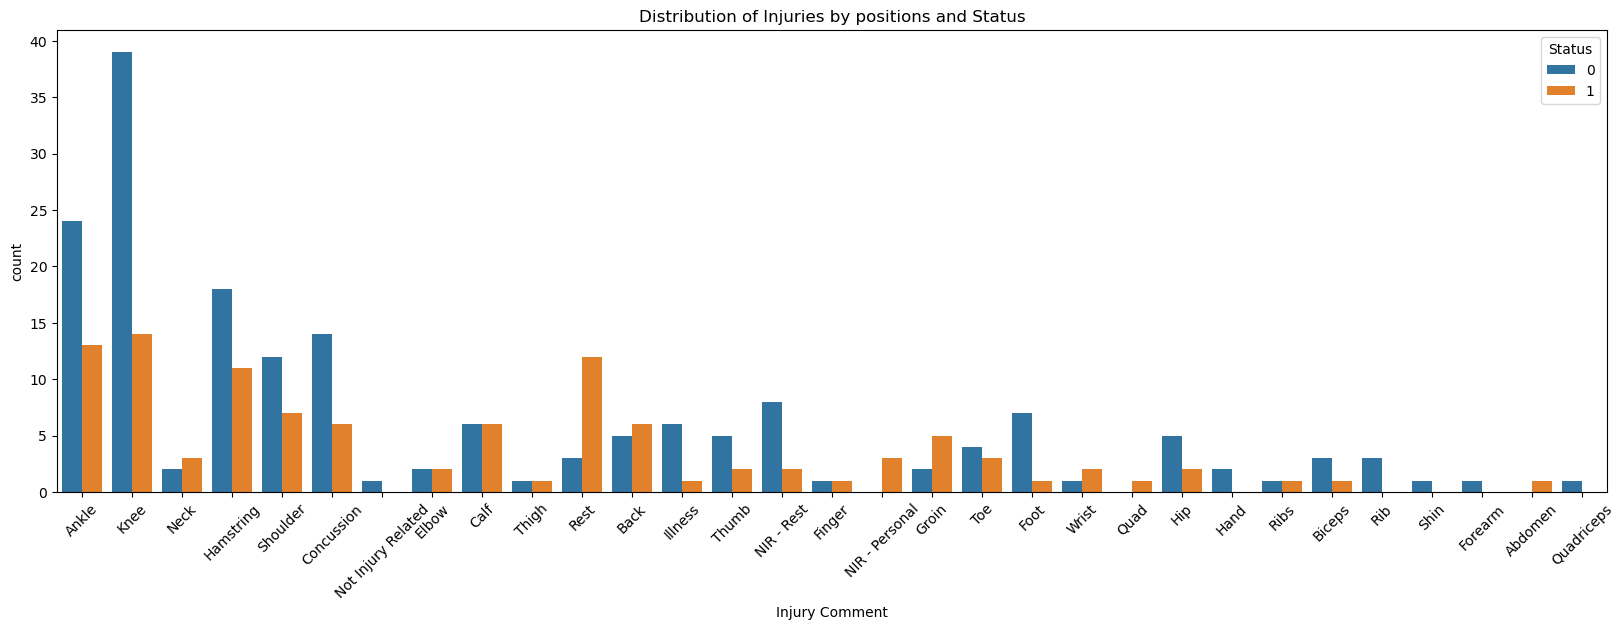

In [8]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Injury Comment', hue='Status', data=df)
plt.title('Distribution of Injuries by positions and Status')
plt.xticks(rotation=45)
plt.show()

Analysis of above chart

Players with knee injuries face the highest likelihood of being sidelined during a game, with ankle, hamstring, shoulder, and concussion injuries following closely in terms of their impact on player participation. Interestingly, players with calf injuries exhibit an equal chance of either remaining in the game or being sidelined.

# creating count plots for each categorical column

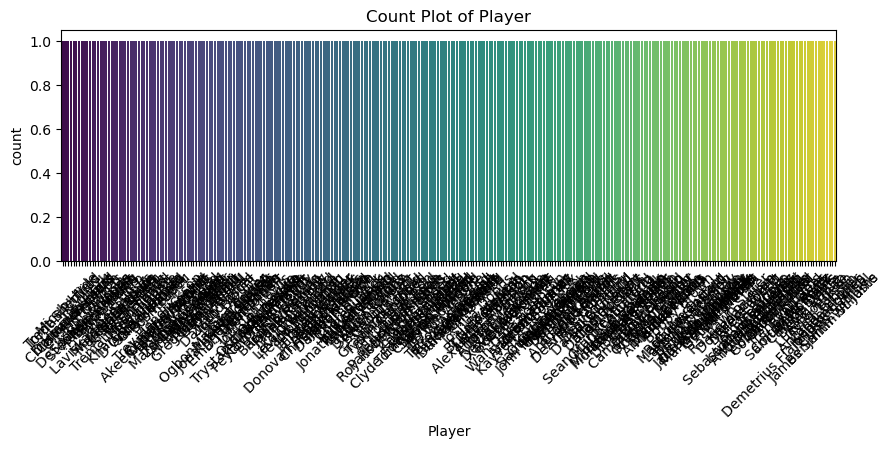

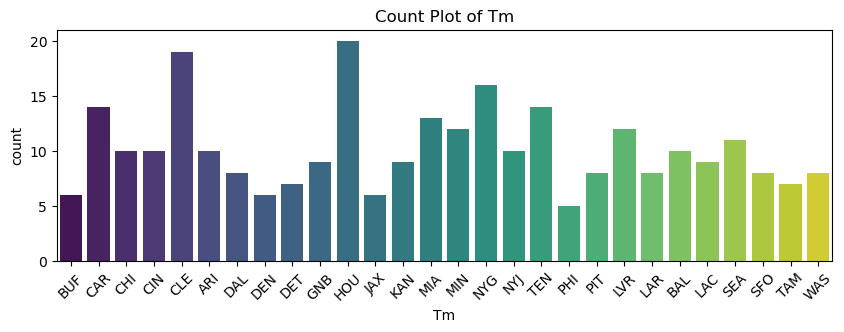

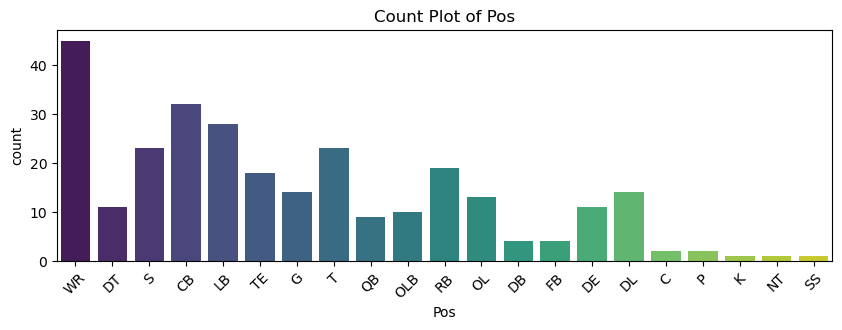

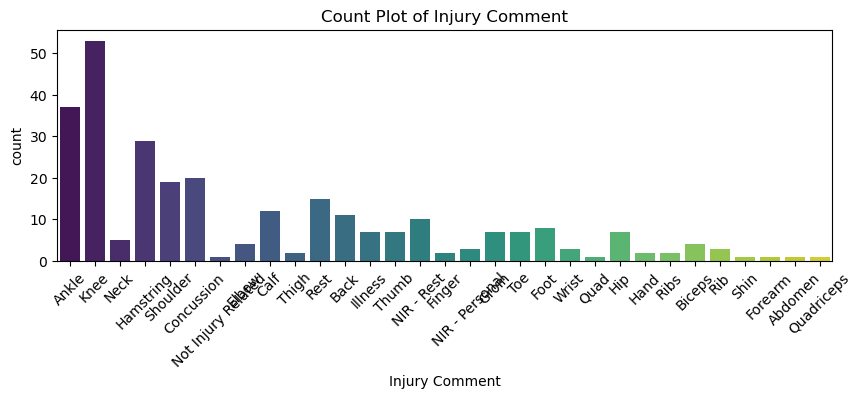

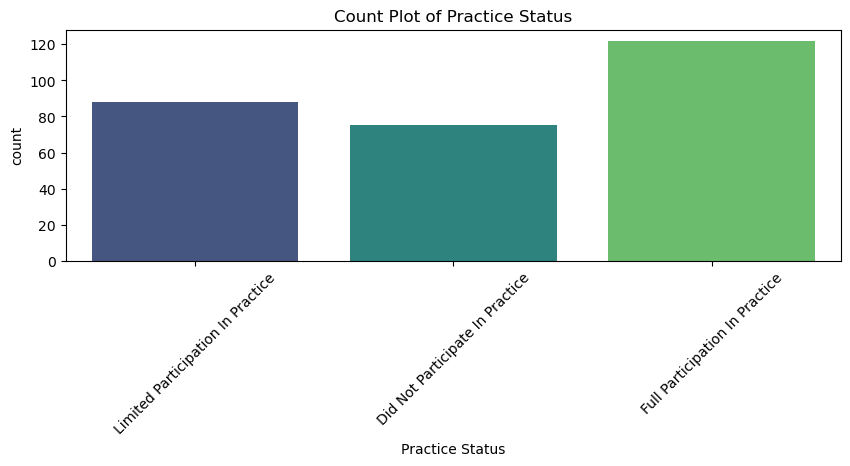

In [9]:
categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    plt.figure(figsize=(10, 3))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)
    plt.show()

# after creating the count plots of each coumn, Following observations can be made

The WR postion player has the highest possibility of getting injured. Whereas the other higher probability of injury chances positions are CB, LB, T, S, RB and TE.

The WR postion player has the highest possibility of getting injured. Whereas the other higher probability of injury chances positions are CB, LB, T, S, RB and TE.

teams HOU, CLE, NYG, TEN, CAE,and MIA are having higher number of injured players.

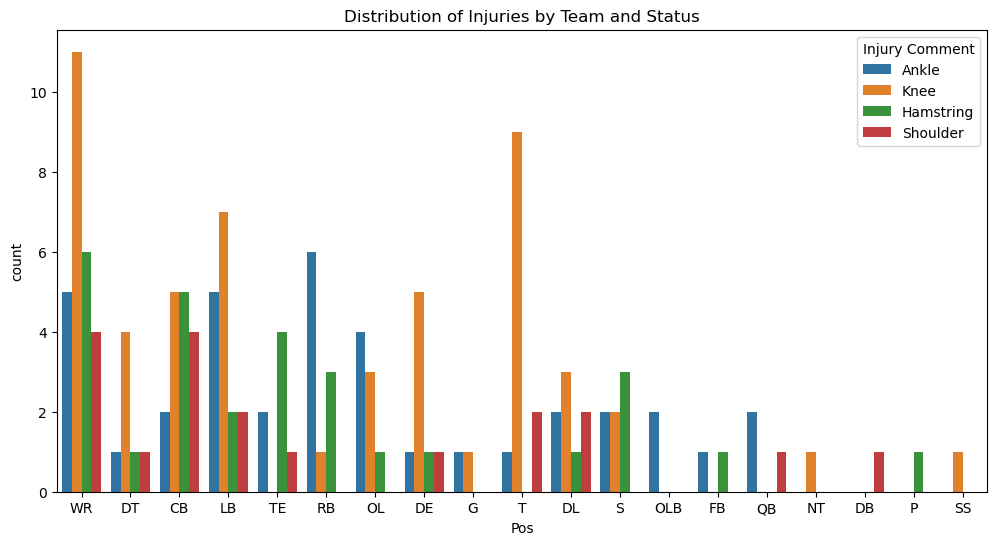

In [10]:

selected_injury_comments = ['Ankle', 'Knee', 'Hamstring', 'Shoulder']  

if not all(isinstance(value, str) for value in selected_injury_comments):
    raise ValueError("All elements in selected_injury_comments must be strings")

# Filter out non-string values and perform case-insensitive comparison
filtered_df = df[df['Injury Comment'].astype(str).str.lower().isin(map(str.lower, selected_injury_comments))]

plt.figure(figsize=(12, 6))
sns.countplot(x='Pos', hue='Injury Comment', data=filtered_df)
plt.title('Distribution of Injuries by Team and Status')
plt.show()




# from the Above analysis of data, it turns out that

WR, T, DE and SS position players have knee injuries in most of the cases.so they are more prone to sustaining knee injury in comparision to the other injuries.

hamstring and knee injuries are most common in all players position.

# LabelEncoder


Using the LabelEncoder from scikit-learn to encode categorical columns in the DataFrame 'df'. 
The LabelEncoder is used to convert categorical labels into numerical values.

In [11]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Pos', 'Tm', 'Practice Status', 'Injury Comment']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

In [12]:
df.sample(10)

,Player,Tm,Pos,Status,Injury Comment,Practice Status,Pos_encoded,Tm_encoded,Practice Status_encoded,Injury Comment_encoded
54,Grant Delpit,CLE,S,1,Rest,Limited Participation In Practice,16,6,2,22
9,DJ Chark,CAR,WR,1,Elbow,Full Participation In Practice,20,3,1,6
109,Robert Woods,HOU,WR,0,Foot,Full Participation In Practice,20,11,1,8
265,Robert Beal,SFO,DL,0,Hamstring,Full Participation In Practice,4,24,1,11
260,Abraham Lucas,SEA,T,0,Knee,Limited Participation In Practice,18,23,2,15
34,Akeem Davis-Gaither,CIN,LB,0,Knee,Full Participation In Practice,9,5,1,15
203,Justin Evans,PHI,S,0,Knee,Limited Participation In Practice,16,21,2,15
53,Pierre Strong,CLE,RB,1,Hamstring,Full Participation In Practice,15,6,1,11
187,Anthony Kendall,TEN,CB,0,Hamstring,Did Not Participate In Practice,1,26,0,11
233,Devin Duvernay,BAL,WR,1,Hamstring,Did Not Participate In Practice,20,1,0,11


In [13]:
df['Status'].isnull().sum()

0

In [14]:
#df['Status'].fillna('1', inplace=True)

In [15]:
df

,Player,Tm,Pos,Status,Injury Comment,Practice Status,Pos_encoded,Tm_encoded,Practice Status_encoded,Injury Comment_encoded
0,Trent Sherfield,BUF,WR,0,Ankle,Limited Participation In Practice,20,2,2,1
1,Jordan Phillips,BUF,DT,0,Knee,Limited Participation In Practice,5,2,2,15
2,Micah Hyde,BUF,S,0,Neck,Limited Participation In Practice,16,2,2,18
3,Christian Benford,BUF,CB,0,Hamstring,Limited Participation In Practice,1,2,2,11
4,Dorian Williams,BUF,LB,0,Knee,Limited Participation In Practice,9,2,2,15
...,...,...,...,...,...,...,...,...,...,...
280,James Smith-Williams,WAS,DE,0,Hamstring,Did Not Participate In Practice,3,27,0,11
281,Kendall Fuller,WAS,CB,0,NIR - Rest,Did Not Participate In Practice,1,27,0,17
282,Jonathan Allen,WAS,DT,1,NIR - Rest,Did Not Participate In Practice,5,27,0,17
283,Benjamin St-Juste,WAS,CB,0,Illness,Full Participation In Practice,1,27,1,14


checking the Dataset if there is any Null Value

In [16]:
df.isnull().sum()

Player                     0
Tm                         0
Pos                        0
Status                     0
Injury Comment             0
Practice Status            0
Pos_encoded                0
Tm_encoded                 0
Practice Status_encoded    0
Injury Comment_encoded     0
dtype: int64

setting up for a simple linear regression model using scikit-learn
1.Prepare Features and Target Variable
2.Split Data into Training and Testing Sets
3.Create and Train the Model
4.Make Predictions
5.Evaluate the Model

In [17]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import Lasso
# from sklearn.preprocessing import StandardScaler

# X = df.drop(['Status'], axis=1)
# y = df['Status']

# # Split the data into training and testing sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Create a Lasso regression model
# model = Lasso(alpha=0.1, random_state=42)  # You can adjust the alpha parameter as needed

# model.fit(X_train_scaled, y_train)
# y_pred = model.predict(X_test_scaled)

# # Calculate Mean Squared Error
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse:.2f}')


preparing the feature matrix X and target variable y for a machine learning model.

In [18]:
#X = df.drop(['Pos_encoded', 'Practice Status_encoded', 'Injury Comment_encoded'], axis=1)
#y = df['Status']

spliting the feature matrix (X) and target variable (y) into training and testing sets using Train_test_split

In [19]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

build a Decision Tree classifier for a football dataset

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('football latest.csv')

df = df.drop(['Player'], axis=1) # Dropped unrequired columns

label_encoder = LabelEncoder()
df['Tm'] = label_encoder.fit_transform(df['Tm'])
df['Pos'] = label_encoder.fit_transform(df['Pos'])
df['Status'] = label_encoder.fit_transform(df['Status'])
df['Practice Status'] = label_encoder.fit_transform(df['Practice Status'])
df['Injury Comment'] = label_encoder.fit_transform(df['Injury Comment'])

X = df.drop(['Status'], axis=1)  # Features
y = df['Status']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.89      0.78        36
           1       0.64      0.33      0.44        21

    accuracy                           0.68        57
   macro avg       0.67      0.61      0.61        57
weighted avg       0.67      0.68      0.65        57



 applying RandomForestClassifier

In [21]:

model.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
y_pred = (model.predict(X_test)).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.89      0.78        36
           1       0.64      0.33      0.44        21

    accuracy                           0.68        57
   macro avg       0.67      0.61      0.61        57
weighted avg       0.67      0.68      0.65        57



In [22]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [23]:
X_test

,Tm,Pos,Injury Comment,Practice Status
9,3,20,6,1
249,14,4,15,2
157,18,14,2,2
209,22,19,11,1
75,7,20,26,1
232,1,18,15,0
264,24,1,15,1
170,19,20,5,2
42,6,20,5,0
225,15,9,15,1


In [24]:
y_test

9      1
249    0
157    0
209    1
75     0
232    1
264    0
170    0
42     1
225    1
46     1
267    0
143    0
168    0
5      0
217    0
230    1
140    0
154    0
33     0
109    0
60     1
68     1
218    0
56     1
93     1
77     0
276    1
273    0
108    0
254    0
158    0
167    0
45     1
79     1
208    0
66     0
82     1
179    0
186    0
30     0
22     0
24     0
132    1
73     1
202    1
224    1
246    0
90     1
203    0
262    0
175    0
92     1
6      0
126    0
255    0
271    0
Name: Status, dtype: int64

using the GradientBoostingClassifier from scikit-learn to create a gradient boosting model

In [25]:
from sklearn.ensemble import GradientBoostingClassifier


model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.89      0.78        36
           1       0.64      0.33      0.44        21

    accuracy                           0.68        57
   macro avg       0.67      0.61      0.61        57
weighted avg       0.67      0.68      0.65        57



using the Logistic Regression model from scikit-learn to create a logistic regression model

In [26]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(random_state=42)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.92      0.78        36
           1       0.62      0.24      0.34        21

    accuracy                           0.67        57
   macro avg       0.65      0.58      0.56        57
weighted avg       0.66      0.67      0.62        57



using the k-Nearest Neighbors (KNN) classifier from scikit-learn to create a model with n_neighbors='3', make predictions on the test set

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        36
           1       1.00      0.57      0.73        21

    accuracy                           0.84        57
   macro avg       0.90      0.79      0.81        57
weighted avg       0.87      0.84      0.83        57



 using the sns.heatmap function from the Seaborn library to create a heatmap of the correlation matrix for the DataFrame df. The heatmap visualizes the correlation between different numerical features in your dataset.

     Tm  Pos  Status  Injury Comment  Practice Status
0     2   20       0               1                2
1     2    5       0              15                2
2     2   16       0              18                2
3     2    1       0              11                2
4     2    9       0              15                2
..   ..  ...     ...             ...              ...
280  27    3       0              11                0
281  27    1       0              17                0
282  27    5       1              17                0
283  27    1       0              14                1
284  27   20       0              29                2

[285 rows x 5 columns]


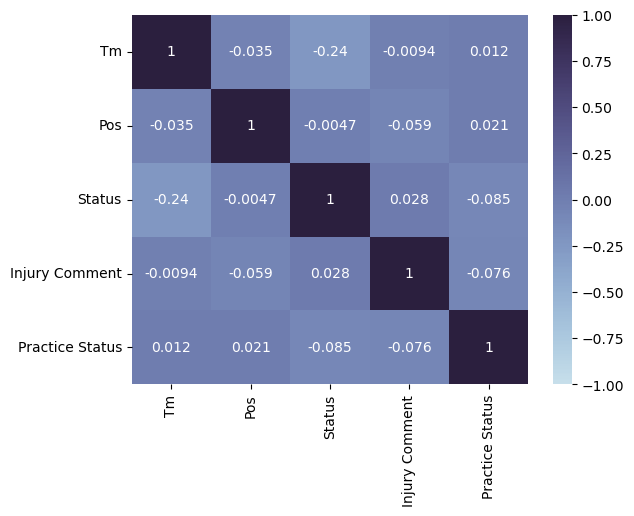

In [28]:
print(df)   
dataplot = sns.heatmap(df.corr(), cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True),vmin = -1, vmax = 1, annot=True) 

In [29]:
#!pip install xgboost


applying the gradient boosting algorithm using the XGBoost library

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
X = df.drop(['Status'], axis=1)
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75        36
           1       0.54      0.33      0.41        21

    accuracy                           0.65        57
   macro avg       0.61      0.58      0.58        57
weighted avg       0.63      0.65      0.63        57

